<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>
<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Resúmenes examen Unidad 2
<a class="tocSkip">    
</h1> 

# Imports section

In [1]:
import pandas as pd
import numpy as np
import xlrd # Para excels
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Working with Data Files.

In [2]:
# Leer csv
# df = pd.read_csv('ruta_al_fichero', sep=",", header=0) se indica la ruta, el separador, y si tiene cabecera
movies = pd.read_csv('data/movies.csv', sep=",", header=0)

In [3]:
# Leer url/link
mpg_link = "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv"
mpg = pd.read_csv(mpg_link)

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
# Guardar ficheros
# Generamos un df aleatorio
np.random.seed(2022)  # seed for reproducibility

# 100 random integers
A = pd.Series(np.random.randint(low = 1, high = 7, size = 100))

# 100 random lowercase letters
import string as str
alphabet_string = str.ascii_lowercase
alphabet = np.array([alphabet_string[i] for i in range(len(alphabet_string))])
B = pd.Series(np.random.choice(alphabet, size=100))

# 100 random floats in [-4, 4]
C = pd.Series(8 * np.random.random_sample(size=100) - 4)

# Use the above as columns for a DataFrame
X = pd.DataFrame({'A':A, 'B':B, 'C':C})
X.head(10)

# Guardamos el fichero
X.to_csv("data/EDA_data_saving.csv", sep=";", index=False)

In [5]:
# Leer excel
book = xlrd.open_workbook("data/train_acc_2010.xls")
# Obtener el numero de hojas del excel
print("The number of worksheets is {0}".format(book.nsheets))
# Obtener los nombres de las hojas de excel
print("Worksheet name(s): {0}".format(book.sheet_names()))
# Obtener numero de filas y columnas de una hoja determinada
sh = book.sheet_by_index(0)
print("{0} {1} {2}".format(sh.name, sh.nrows, sh.ncols))
# Obtener el valor de una celda en concreto
print("Cell D30 is {0}".format(sh.cell_value(rowx=30, colx=3)))

# Se puede leer así también
xlsx_file = './data/train_acc_2010.xls'
train_accidents = pd.read_excel(xlsx_file)

The number of worksheets is 3
Worksheet name(s): ['Sheet1', 'Sheet2', 'Sheet3']
Sheet1 2622 18
Cell D30 is 6.0


In [6]:
# Leer otros formatos (Stata)
auto2 = pd.read_stata("data/auto2.dta")
auto2.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,Average,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,Average,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,Average,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,Good,4.0,20,4080,222,43,350,2.41,Domestic


In [7]:
# Mostrar primeras filas del df
movies.head(20) # el argumento es opcional, para mostrar n filas. Por defecto = 5

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
1,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
2,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
3,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
4,Water For Elephants,Drama,20th Century Fox,72,3.081421,60,$117.09,2011
5,WALL-E,Animation,Disney,89,2.896019,96,$521.28,2008
6,Waitress,Romance,Independent,67,11.089742,89,$22.18,2007
7,Waiting For Forever,Romance,Independent,53,0.005000,6,$0.03,2011
8,Valentine's Day,Comedy,Warner Bros.,54,4.184038,17,$217.57,2010
9,Tyler Perry's Why Did I get Married,Romance,Independent,47,3.724192,46,$55.86,2007


In [8]:
# Para imprimir la forma del df (filas, columnas)
movies.shape

(77, 8)

In [9]:
# Para realizar filtros sobre columnas (Genérico)
movies.loc[movies.Year == 2010]

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
1,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
2,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
8,Valentine's Day,Comedy,Warner Bros.,54,4.184038,17,$217.57,2010
20,The Back-up Plan,Comedy,CBS,47,2.202571,20,$77.09,2010
21,Tangled,Animation,Disney,88,1.365692,89,$355.01,2010
23,She's Out of My League,Comedy,Paramount,60,2.440500,57,$48.81,2010
24,Sex and the City Two,Comedy,Warner Bros.,49,2.883500,15,$288.35,2010
25,Sex and the City 2,Comedy,Warner Bros.,49,2.883500,15,$288.35,2010
27,Remember Me,Drama,Summit,70,3.491250,28,$55.86,2010


In [10]:
#Para realizar filtros sobre columnas (y obtener una columna determinada)
movies.loc[movies.Year == 2010, "Genre"]

0        Comedy
1        Comedy
2        Comedy
8        Comedy
20       Comedy
21    Animation
23       Comedy
24       Comedy
25       Comedy
27        Drama
32       Comedy
48       Comedy
49       Comedy
51       Comedy
52       Comedy
54       Action
55       Comedy
58       Comedy
62       Comedy
70        Drama
Name: Genre, dtype: object

In [11]:
# Para obtener el tipo de un objeto 
type(movies)

pandas.core.frame.DataFrame

In [12]:
# Loc sirve para filtrar por nombres de columnas, iloc funciona con indices, para seleccionar rangos de filas y columnas
movies.iloc[20: 25, 3: 6] # [filas, columnas]

,Audience score %,Profitability,Rotten Tomatoes %
20,47,2.202571,20
21,88,1.365692,89
22,48,1.719514,15
23,60,2.440500,57
24,49,2.883500,15


In [13]:
# Imprimir columnas
movies.columns

Index(['Film', 'Genre', 'Lead Studio', 'Audience score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

In [14]:
# Describir dataset: Hay que explicarlo un poco después de ejecutar la funcion
movies.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Year
count,77.000000,77.000000,77.000000,77.000000
mean,63.727273,4.599483,46.701299,2009.077922
std,13.657113,8.031990,26.095001,1.354974
min,35.000000,0.000000,3.000000,2007.000000
25%,52.000000,1.751351,26.000000,2008.000000
50%,64.000000,2.642353,45.000000,2009.000000
75%,76.000000,5.103117,64.000000,2010.000000
max,89.000000,66.934000,96.000000,2011.000000


In [15]:
# Información del dataset. Buen punto de partida para analizar dataset, combinado con describe proporciona la mayoría de info.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               77 non-null     object 
 1   Genre              77 non-null     object 
 2   Lead Studio        77 non-null     object 
 3   Audience score %   77 non-null     int64  
 4   Profitability      77 non-null     float64
 5   Rotten Tomatoes %  77 non-null     int64  
 6   Worldwide Gross    77 non-null     object 
 7   Year               77 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ KB


#  Clasificación de las variables.
## Discretas - Cuantitativas: Tabla de frecuencia

In [16]:
# Frecuencia absoluta
AbsFreq_X = X['A'].value_counts().sort_index() # Para ordenar los valores
AbsFreq_X

1    20
2    17
3    16
4    12
5    13
6    22
Name: A, dtype: int64

In [17]:
# La suma de los valores de la tabla es igual al numero de elementos (filas)
print(f"Suma de la frecuencia: {sum(AbsFreq_X)} === Tamaño del DF: {X.shape[0]}")

Suma de la frecuencia: 100 === Tamaño del DF: 100


In [18]:
# Frecuencia relativa
RelFreq_X = X['A'].value_counts(normalize=True).sort_index()
RelFreq_X

1    0.20
2    0.17
3    0.16
4    0.12
5    0.13
6    0.22
Name: A, dtype: float64

In [19]:
print(f"Suma de la frecuencia: {sum(RelFreq_X)}")

Suma de la frecuencia: 1.0


In [20]:
# Frecuencia absoluta acumulada
AbsFreq_X.cumsum()

1     20
2     37
3     53
4     65
5     78
6    100
Name: A, dtype: int64

In [21]:
# Frecuencia relativa acumulada
RelFreq_X.cumsum()

1    0.20
2    0.37
3    0.53
4    0.65
5    0.78
6    1.00
Name: A, dtype: float64

## Continuas - Cuantitativas

In [22]:
# Binning --> Para convertir variables contínuas en discretas
#            (se meten en contenedores grupos de valores)
pd.cut(X['C'], 8) # El 8 especifica el numero de grupos que queremos hacer.
# Si hacemos el cut así, pandas genera de forma aleatoria los fragmentos

0       (1.012, 2.008]
1       (2.008, 3.004]
2       (1.012, 2.008]
3         (3.004, 4.0]
4     (-2.971, -1.975]
            ...       
95        (3.004, 4.0]
96     (-1.975, -0.98]
97      (1.012, 2.008]
98     (0.0163, 1.012]
99     (-1.975, -0.98]
Name: C, Length: 100, dtype: category
Categories (8, interval[float64, right]): [(-3.975, -2.971] < (-2.971, -1.975] < (-1.975, -0.98] < (-0.98, 0.0163] < (0.0163, 1.012] < (1.012, 2.008] < (2.008, 3.004] < (3.004, 4.0]]

In [23]:
# Para generar contenedores ("rangos") controlados, podemos especificarlo de la siguiente forma
C_nodes = np.arange(-4, 5, 1) # Con esto, generamos un array de numeros ordenados del -4 al 4, con saltos de 1 en 1 (rango en el que se mueve la variable c, que podriamos averiguar sacando el min y max)

print(C_nodes)

pd.cut(X['C'], bins=C_nodes, ordered=True) # Ahora le indicamos en el param bins los rangos de los contenedores que debe usar

[-4 -3 -2 -1  0  1  2  3  4]


0       (1, 2]
1       (2, 3]
2       (1, 2]
3       (3, 4]
4     (-3, -2]
        ...   
95      (3, 4]
96    (-2, -1]
97      (1, 2]
98      (0, 1]
99    (-2, -1]
Name: C, Length: 100, dtype: category
Categories (8, interval[int64, right]): [(-4, -3] < (-3, -2] < (-2, -1] < (-1, 0] < (0, 1] < (1, 2] < (2, 3] < (3, 4]]

In [24]:
# Lo podemos guardar como una columna mñás del df para usarlo como un factor ordenado (más adelante)
X['C_binned'] = pd.cut(X['C'], bins=C_nodes, ordered=True)
print(X.head(10))

   A  B         C  C_binned
0  6  k  1.612108    (1, 2]
1  5  m  2.581690    (2, 3]
2  6  z  1.908050    (1, 2]
3  1  v  3.903152    (3, 4]
4  2  x -2.726556  (-3, -2]
5  2  y  3.904638    (3, 4]
6  1  a  1.810280    (1, 2]
7  1  w  0.800752    (0, 1]
8  3  y -2.733084  (-3, -2]
9  1  i -3.413324  (-4, -3]


In [25]:
# Una vez agrupada la variable, ya podemos generar las tablas de frecuencia
X['C_binned'].value_counts().sort_index()

(-4, -3]    14
(-3, -2]    14
(-2, -1]    12
(-1, 0]      9
(0, 1]      10
(1, 2]      13
(2, 3]       9
(3, 4]      19
Name: C_binned, dtype: int64

# Medidas de centralidad y dispersion.

In [26]:
# pasos previos
# ponemos una semilla para obtener siempre el mismo resultado de aleatoriedad
rng = np.random.default_rng(2022)
# Generamos un array de valores aleatorios para este ejemplo
x = rng.choice(101, 50, replace=True)
x

array([ 71,  24,  75,   9,  19,  61,  94,   6,   6,  66,  87,  76,  82,
        11,  57,   4,  10,  41,  88,  99,  38,  97,   0,  25,  62,  56,
        37,  24,   8,  32,  31,  90,  34,  95,  90,  72,   5,  93,  71,
       100,   2,  25,  62,   6,  46,  95,  64,  65,  71,  32], dtype=int64)

In [27]:
# Media aritmética
print(f"Media caclulada por python: {x.mean()}")
print(f"Media caclulada por formula: {x.sum()/x.size}")

Media caclulada por python: 50.28
Media caclulada por formula: 50.28


In [28]:
# Mediana
print("The NumPy array is \n", x)
print("It has ",x.size, " elements.")
x_sorted = np.sort(x)
print("The sorted array is \n", x_sorted)
if(x.size % 2 == 0):
    print("The two central values are: ", x_sorted[24:26])
    print(f"La mediana calculada a mano: {sum(x_sorted[24:26])/2}")
    print(f"La mediana calculada por pyton: {np.median(x)}")    

The NumPy array is 
 [ 71  24  75   9  19  61  94   6   6  66  87  76  82  11  57   4  10  41
  88  99  38  97   0  25  62  56  37  24   8  32  31  90  34  95  90  72
   5  93  71 100   2  25  62   6  46  95  64  65  71  32]
It has  50  elements.
The sorted array is 
 [  0   2   4   5   6   6   6   8   9  10  11  19  24  24  25  25  31  32
  32  34  37  38  41  46  56  57  61  62  62  64  65  66  71  71  71  72
  75  76  82  87  88  90  90  93  94  95  95  97  99 100]
The two central values are:  [56 57]
La mediana calculada a mano: 56.5
La mediana calculada por pyton: 56.5


In [29]:
# Cuartiles
rng = np.random.default_rng(2022)
vals = rng.standard_normal(4000)
print(vals[0:20])
np.quantile(vals, [0.25, 0.5, 0.75])

[ 2.67641529 -0.84279441  2.07818003 -1.52765993  0.39617851 -0.09590611
 -2.47541091 -0.36716256  0.59226504 -2.9312485  -1.44023358  0.07888769
  0.5856408   1.66771611 -1.14089297 -0.20990006  0.49681204  1.01997171
 -0.88286937 -1.33132135]


array([-0.67130487,  0.00222268,  0.62840904])

In [30]:
# Percentiles
# Son similares a los cuartiles, con la misma función podremos generar tantos 
#  bloques como queramos
perc = np.arange(0, 1, 0.01)
print(perc)
np.quantile(vals, perc)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


array([-3.27394763e+00, -2.28882732e+00, -2.02356437e+00, -1.83077279e+00,
       -1.72722573e+00, -1.61780476e+00, -1.53357491e+00, -1.46395970e+00,
       -1.39383274e+00, -1.33472921e+00, -1.27251210e+00, -1.22562716e+00,
       -1.16843926e+00, -1.13541591e+00, -1.06952078e+00, -1.01903161e+00,
       -9.74105967e-01, -9.41045106e-01, -9.06087405e-01, -8.64943109e-01,
       -8.29958742e-01, -7.91520814e-01, -7.65543148e-01, -7.33820294e-01,
       -6.99696860e-01, -6.71304866e-01, -6.35542417e-01, -6.01629054e-01,
       -5.77012192e-01, -5.44792574e-01, -5.17220683e-01, -4.84291471e-01,
       -4.56953877e-01, -4.24116593e-01, -4.00247122e-01, -3.77193249e-01,
       -3.48810969e-01, -3.21025149e-01, -2.93107332e-01, -2.61105037e-01,
       -2.34061317e-01, -2.09934182e-01, -1.90935913e-01, -1.63896231e-01,
       -1.40983572e-01, -1.16843949e-01, -9.52481420e-02, -6.83550575e-02,
       -4.26515640e-02, -2.56754860e-02,  2.22267932e-03,  2.26286927e-02,
        5.08052420e-02,  

In [31]:
# Minimo
vals.min()

-3.273947625745032

In [32]:
# Máximo
vals.max()

3.5697078782939164

In [33]:
# Range = recorrido. Funcion peak to peak
vals.ptp()

6.843655504038948

In [34]:
# Ranco intercuartílico. 50% centro de los datos
print(f"Rango intercuartílico a mano: {np.quantile(vals, 0.75) - np.quantile(vals, 0.25)}")
print(f"Rango intercuartílico mediante python: {stats.iqr(vals)}")


Rango intercuartílico a mano: 1.299713905814915
Rango intercuartílico mediante python: 1.299713905814915


In [35]:
# Varianza y desviación típica poblacional (todo el dataset) --> ddof = 0 
print("Variance of the speed: ", train_accidents['Speed'].var(ddof = 0))
print("Standard deviation: ", train_accidents['Speed'].std(ddof = 0))


Variance of the speed:  321.84349225817994
Standard deviation:  17.939996997161956


In [36]:
# Varianza y desviación típica muestral (para una muestra) --> solemos usar este.
print("Sample variance of the speed: ", train_accidents['Speed'].var())
print("and sample standard deviation: ", train_accidents['Speed'].std())

Sample variance of the speed:  321.9663332857594
and sample standard deviation:  17.943420334087907


In [37]:
# Calculo de los valores atípicos --> Menores que el primer cuartil - 1,5*rango intercuartílico, mayores que el tercer cuartil +1,5*rango_intercuartíloco
# Calculamos el rango intercuartílico
price_iqr = stats.iqr(auto2.price)
print(f"Rango intercuartílico: {price_iqr}")
# Para localizar el primer y tercer cuartil.
price_q1, price_q3 = np.quantile(auto2.price, [0.25, 0.75])

# Limites de los valores atípicos
cut_low = price_q1 - 1.5 * price_iqr
cut_high = price_q3 + 1.5 * price_iqr

print("Lower and upper outlier limits:", cut_low, ", ", cut_high)

# Obtenemos de nuestro dataset todos los valores atípicos segun los limites calculados
price_outliers = auto2.loc[(auto2.price < cut_low) | (auto2.price > cut_high)]

print("The outliers are")

price_outliers
# Representación mediante boxpots (sección gráficos)

Rango intercuartílico: 2112.0
Lower and upper outlier limits: 1052.25 ,  9500.25
The outliers are


,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
8,Buick Riviera,10372,16,Average,3.5,17,3880,207,43,231,2.93,Domestic
10,Cad. Deville,11385,14,Average,4.0,20,4330,221,44,425,2.28,Domestic
11,Cad. Eldorado,14500,14,Fair,3.5,16,3900,204,43,350,2.19,Domestic
12,Cad. Seville,15906,21,Average,3.0,13,4290,204,45,350,2.24,Domestic
25,Linc. Continental,11497,12,Average,3.5,22,4840,233,51,400,2.47,Domestic
26,Linc. Mark V,13594,12,Average,2.5,18,4720,230,48,400,2.47,Domestic
27,Linc. Versailles,13466,14,Average,3.5,15,3830,201,41,302,2.47,Domestic
40,Olds Toronado,10371,16,Average,3.5,17,4030,206,43,350,2.41,Domestic
52,Audi 5000,9690,17,Excellent,3.0,15,2830,189,37,131,3.20,Foreign
54,BMW 320i,9735,25,Good,2.5,12,2650,177,34,121,3.64,Foreign


## Factores

In [38]:
# para marcar una variable como categoría en vez de como object
# Primero podemos analizar las variables que nos interesa convertir.
# Estas son aquellas que pueden categorizar el dataset en dif categorias. 
# Viendo sus tablas de frecuencias observamos que tiene sentido
print(train_accidents.TrkType.value_counts().sort_index(), "\n"*2, 
      train_accidents.AccType.value_counts().sort_index(), "\n"*2)

# podemos convertir las variables a categorias así:
train_accidents = train_accidents.astype({'TrkType':'category', 
                                          'AccType':'category'})
print(train_accidents.info())

Industry      247
Main          975
Not rptd        3
Siding         56
Yard         1340
Name: TrkType, dtype: int64 

 Coll      251
Der      1543
Oth       827
Name: AccType, dtype: int64 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Acident   2621 non-null   int64   
 1   Railroad  2621 non-null   object  
 2   Month     2621 non-null   int64   
 3   Day       2621 non-null   int64   
 4   State     2621 non-null   object  
 5   County    2621 non-null   object  
 6   TrkType   2621 non-null   category
 7   TrkMnt    2621 non-null   object  
 8   AccType   2621 non-null   category
 9   AccCause  2621 non-null   object  
 10  EqpDamg   2621 non-null   int64   
 11  TrkDamg   2621 non-null   int64   
 12  Killed    2621 non-null   int64   
 13  Injured   2621 non-null   int64   
 14  RREquip   2621 non-null   object  
 15  Speed     2621

In [39]:
# Otra forma de hacerlo
# Vemos el tipo de variables
print(movies.info(), "\n"*2)

# Seleccionamos las que son object para ver su contenido 
print(movies.select_dtypes(include="object"),"\n"*2)
# Analizamos cuales podrían categorizar el dataset (factores)(genero y leadstudio)
factorCols = movies.select_dtypes(include='object').iloc[:, 1:3].columns
print(f"Factor cols: {factorCols}", "\n"*2)
# Las convertimos a category
movies.loc[:, factorCols] = movies.loc[:, factorCols].astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               77 non-null     object 
 1   Genre              77 non-null     object 
 2   Lead Studio        77 non-null     object 
 3   Audience score %   77 non-null     int64  
 4   Profitability      77 non-null     float64
 5   Rotten Tomatoes %  77 non-null     int64  
 6   Worldwide Gross    77 non-null     object 
 7   Year               77 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ KB
None 


                                  Film    Genre            Lead Studio  \
0                      Youth in Revolt   Comedy  The Weinstein Company   
1   You Will Meet a Tall Dark Stranger   Comedy            Independent   
2                         When in Rome   Comedy                 Disney   
3                What Happens in Vegas   Comedy     

# Gráficos
## Variables discretas &#8594; Grafico de barras


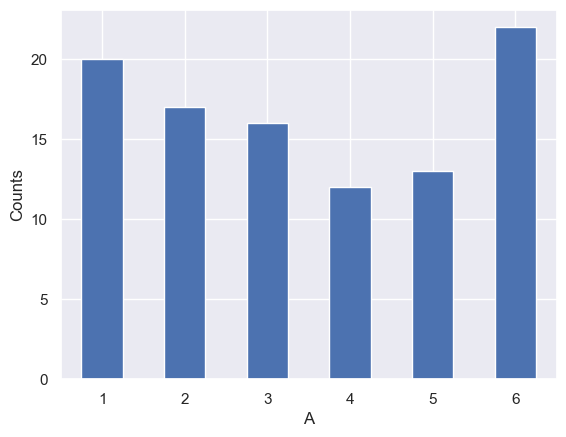

In [40]:
sns.set()
# Gráfico de barras
# Seteas los nombres de los ejes (xlabel e ylabel)
# seteas la rotacion de los indices de los ejes (0 mejor)
# Graficas el dataset Abs_Freq
plot = AbsFreq_X.plot.bar(rot=0, xlabel='A', ylabel ='Counts')

## Variables continuas &#8594; Histograma / Curva de densidad

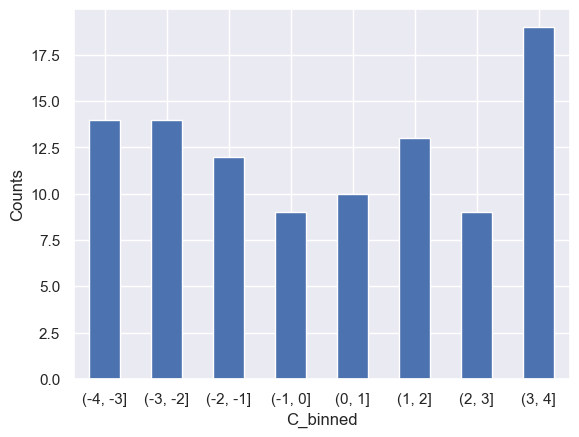

In [41]:
# pintamos las frecuencias (tras binned) con graf de barras
plot = X['C_binned'].value_counts().sort_index().plot.bar(rot=0, xlabel='C_binned', ylabel ='Counts')

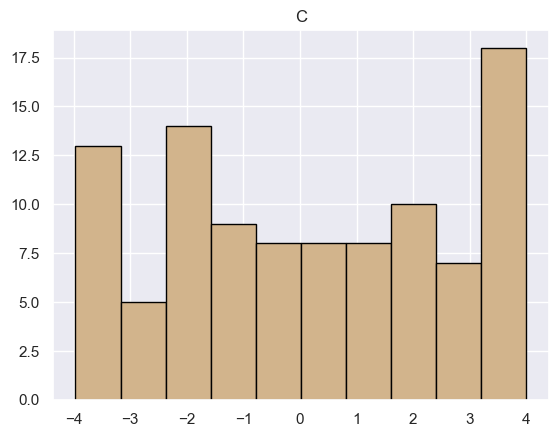

In [42]:
# pintamos la variable continua con hist.
# indicamos la variable a pintar (C)
# indicamos el color de la linea de las cajas del hist (edgecolor)
# Indicamos el grosor de la linea (linewidth)
# Indicamos si queremos que haya cuadrícula detrás (grid)
# Indicamos el color de las cajas (color)
# Si no indicamos nada, python cogerá el valor de bins que mejor le convenga. Es bueno especificar los C_binns que hemos creado antes
plot = X.hist('C', edgecolor='black', linewidth=1, grid=True, color="tan")

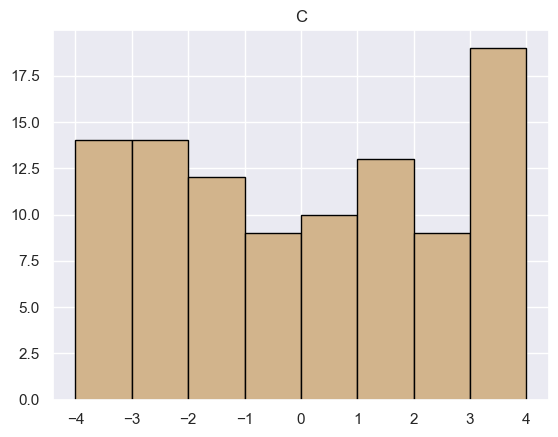

In [43]:
# Indicamos los bins que debe usar
plot = X.hist('C', edgecolor='black', linewidth=1, grid=True, color="tan", bins=C_nodes)

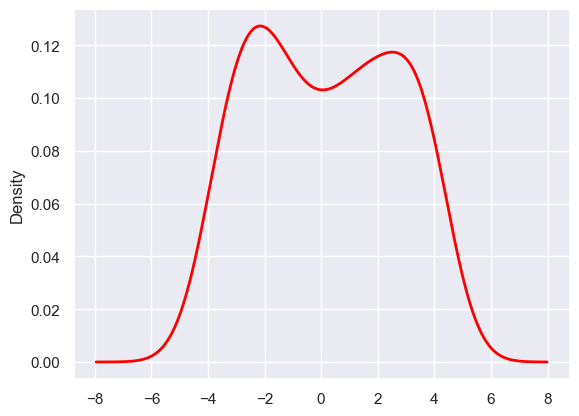

In [44]:
# Curva de densidad de la variable C
# Indicamos el grosor de la linea
# indicamos si queremos cuadrícula
# Indicamos el color de la linea
getPlot = X['C'].plot.density(linewidth=2, grid=True, color = "red")

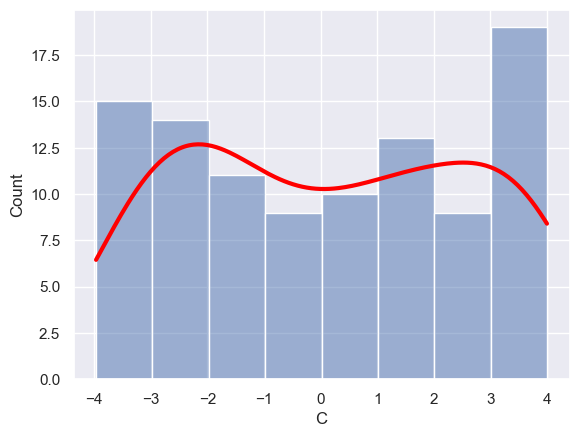

In [45]:
# Se pueden pintar juntos histograma y curva de densidad
# KDE pinta la linea de densidad (sin ello solo pinta el histograma)
# data = Estructura/datos de entrada
# x, y = vectores o claves que especifican los ejes
# stat = density --> para normalizar el eje y, el area total suma 1 (rel_freq)
dens_plot = sns.histplot(data = X, x = 'C', kde=True)#, stat='density')
# Editamos el color y grosor de la curva de densidad
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

## Distribuciones

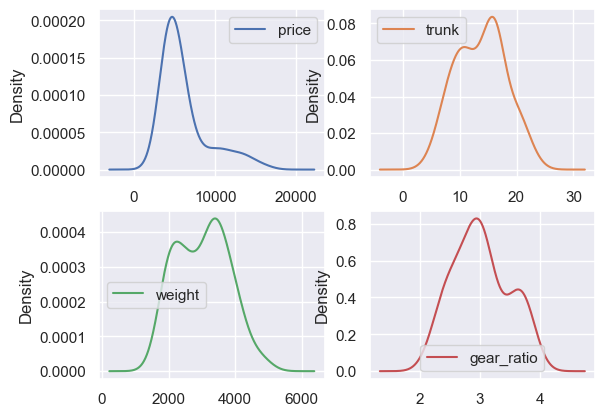

In [46]:
# Estamos pintando, para todas las filas del dataset y las columnas indicadas,  su gráfico de densidad.
# Sublplots = realiza subplots separadas oara las columnas indicadas
# Layout para indicar cómo queremos ver las gráficas
# IMPORTANTE: sharex y shary es para que compartan los ejes si está a true. Poner siempre a false para evitar confusiones

densities = auto2.loc[:, ['price', 'trunk', 'weight', 'gear_ratio']].plot.density(
    subplots=True, layout=(2,2), sharex=False,sharey=False)

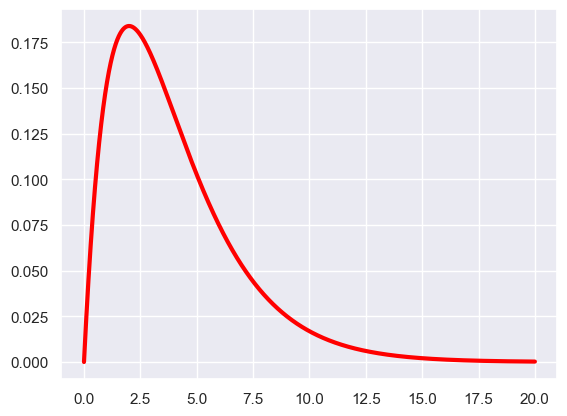

In [47]:
### Ditribucion unimodal
x = np.arange(0, 20, 0.001)
getPlot = plt.plot(x, stats.chi2.pdf(x, df=4), color='red', linewidth=3)

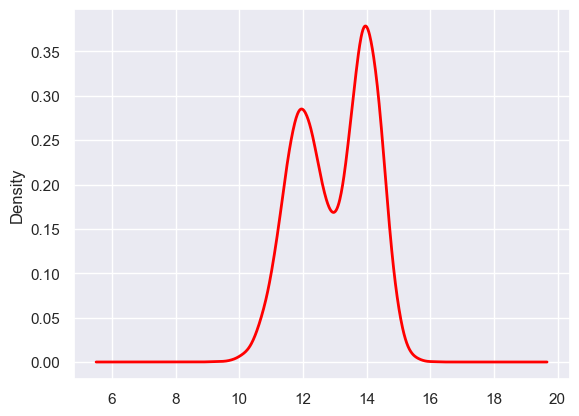

In [48]:
### Ditribucion multimodal
# creamos el dataframe (dos normales concatenadas)
N = 10000
mu1 = 12
sigma1 = 0.7
mu2 = 14
sigma2 = 0.5
W1 = np.random.normal(loc = mu1, scale = sigma1, size = N)
W2 = np.random.normal(loc = mu2, scale = sigma2, size = N)
W = np.concatenate((W1, W2), axis = None)
W.shape
X2 = pd.DataFrame({'W':W})
# hacemos el plot de su curva de densidad
getPlot = X2['W'].plot.density(linewidth=2, color = "red")

### Simetría y sesgo

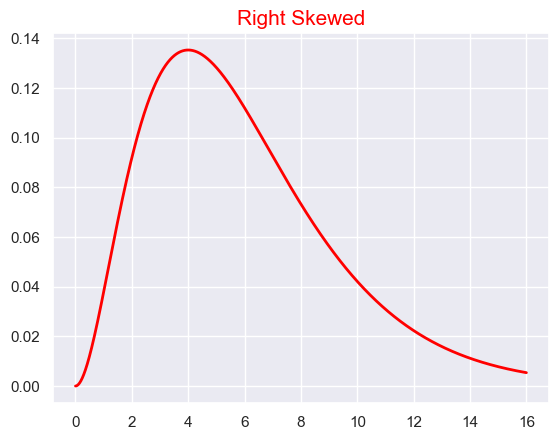

In [49]:
x = np.arange(0, 16, 0.001)
plt.plot(x, stats.chi2.pdf(x, df=6), color='red', linewidth=2)
getPlot = plt.title('Right Skewed', fontdict={'fontsize': 15, 'color':'red'})

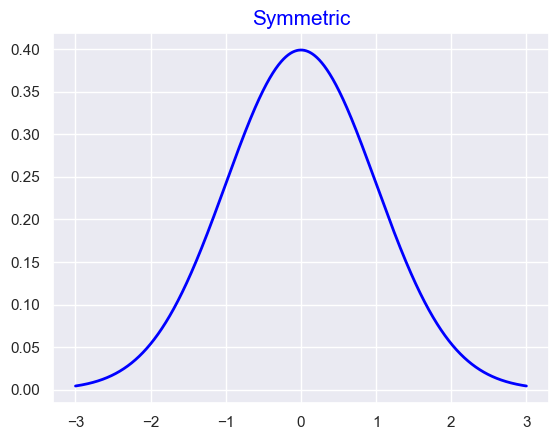

In [50]:
x = np.arange(-3, 3, 0.001)
plt.plot(x, stats.norm.pdf(x), color='blue', linewidth=2)
getPlot = plt.title('Symmetric', fontdict={'fontsize': 15, 'color':'blue'})

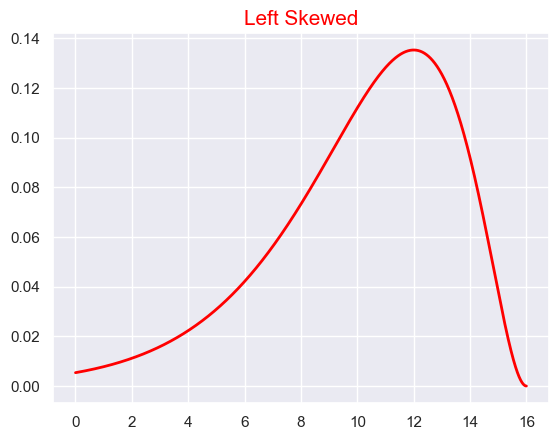

In [51]:
x = np.arange(0, 16, 0.001)
plt.plot(x, stats.chi2.pdf(16 - x, df=6), color='red', linewidth=2)
getPlot = plt.title('Left Skewed', fontdict={'fontsize': 15, 'color':'red'})

## Boxplots &#8594; Valores atípicos

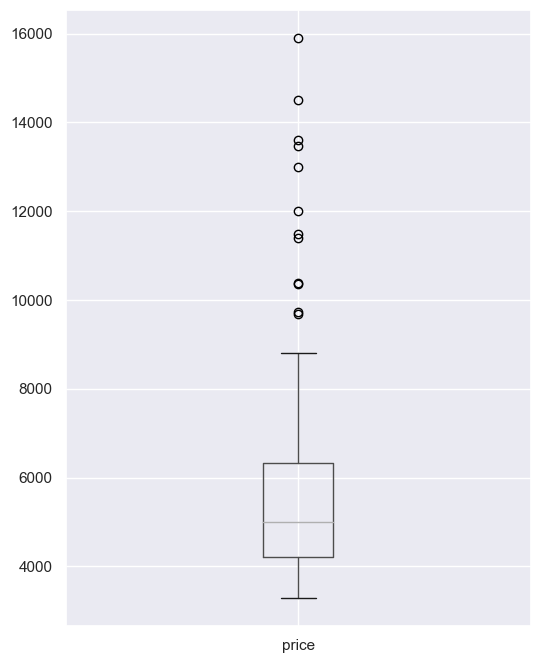

In [52]:
getPlot = auto2.boxplot(column='price', figsize=(6, 8))

## Violinplots &#8594; Valores atípicos (como complemento de los boxplots)

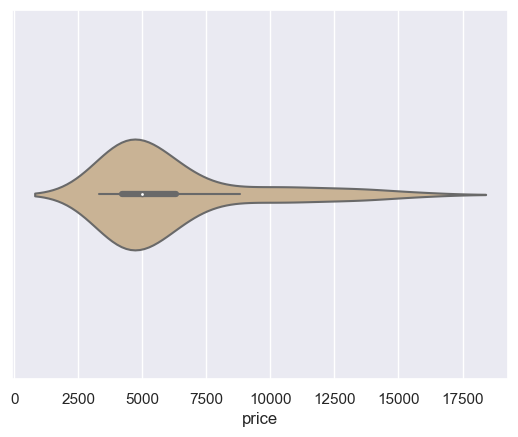

In [53]:
#alpha para transparencia
ax = sns.violinplot(x = 'price', data=auto2, width=0.3, alpha=0.03, color = "tan")

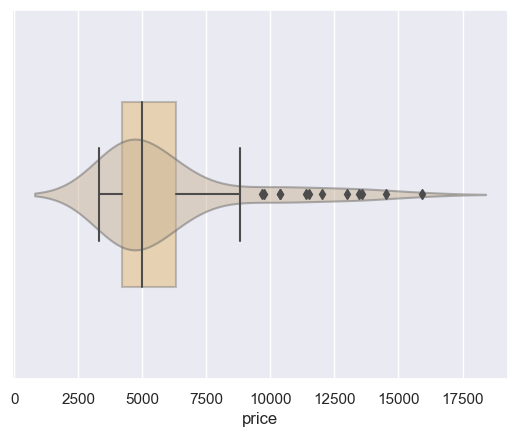

In [54]:
# superponiendo ambos podemos ver mejor los puntos y los outliers
ax = sns.boxplot(x = 'price', data=auto2, width=0.5, color="orange", boxprops=dict(alpha=.3))
ax = sns.violinplot(x = 'price', data=auto2, width=0.3, color = "tan", inner=None)
# para ir ajustando alpha
for violin, alpha in zip(ax.collections[::2], [0.5]):
    violin.set_alpha(alpha)

## Dispersión &#8594; Stripplot

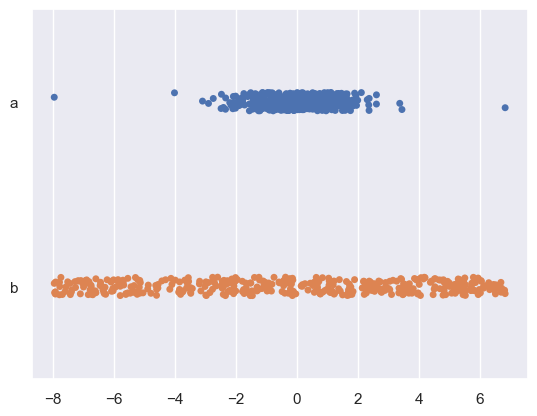

In [55]:
n = 400
A = np.array(np.random.normal(size = n))
minA = A.min()
maxA = A.max()
#A[0:10] = np.random.uniform(low = 2 * minA, high=2 * maxA, size = 10)
B = np.array(np.random.uniform(low = 2 * minA, high=2 * maxA, size = n))
A[0:2] = np.array([B.min(), B.max()])
A = np.hstack((A, B))
F = np.hstack((np.full(shape = (n,), fill_value='a'),
               np.full(shape = (n,), fill_value='b')))
# print(A.mean(), B.mean())

X3 = pd.DataFrame({'A':A, 'F':F})

ax = sns.stripplot(y="F", x="A", data=X3, jitter=0.05)
getPlot = ax.set(xlabel="", ylabel="")

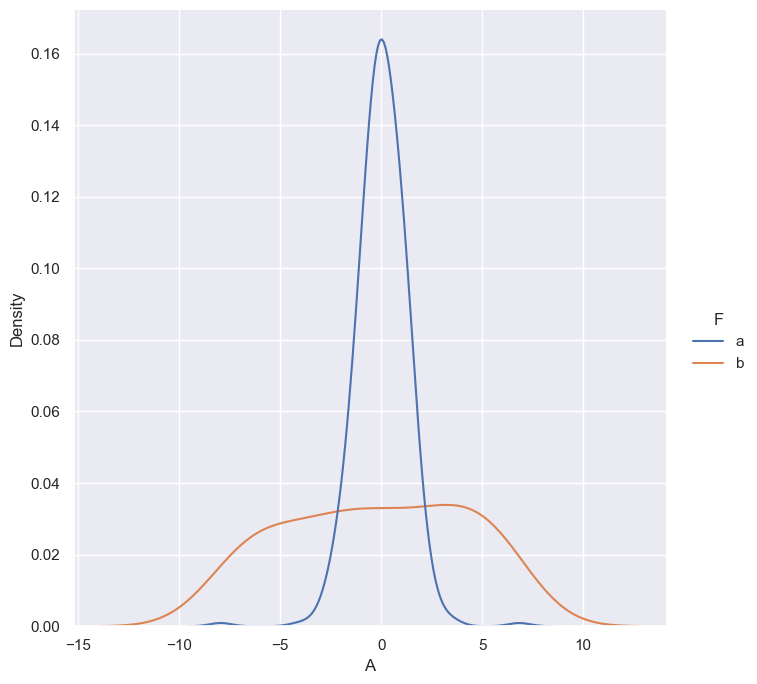

In [56]:
# También se puede ver la dispersión con curvas de densidad
# kind = kde para gráfico de densidad
# Hue = para pintar ambas variables (diferencia por la clase = F y pinta los valores de la clase a y la b)
getPlot = sns.displot(X3, x="A", kind="kde", hue = "F", height=7, bw_adjust=1.5)